# 二维物理参数分布模拟（`map2d`）

In [1]:
from gehong import map2d as m
from gehong import config as c
import numpy as np
import matplotlib.pyplot as plt

### 光谱格式配置项

`config`模块用来配置模拟光谱的格式，包括波长方向配置（波长范围、波长间隔）和空间方向配置（像素数、像素大小）。默认配置下模拟得到的三维数据立方可直接用于`csst-ifs-etc`的计算。

In [2]:
config = c.config()

## 二维物理参数分布初始化

在`gehong`中，所有的二维分布均基于`map.Map2d()`以类的形式进行传递。因此在模拟二维分布之前，需要对其进行初始化。

例如，模拟一个面亮度分布

In [3]:
sbmap = m.Map2d(config)

# 参数化二维分布模拟

`gehong`提供了三种参数化二维图像模拟：Sersic模型，tanh速度场模型，梯度模型

### Sersic模型

类`Map2d`的方法`.sersic_map()`可以用来为该二维分布类模拟一个二维Sersic分布。其中，`mag`表示该Sersic模型的积分星等，`r_eff`为有效半径（单位：arcsec），`ellip`为椭率，`theta`为方向角。模拟得到的二维分布存储在属性`.map`中。

下面的例子为模拟一个Sersic面亮度分布。

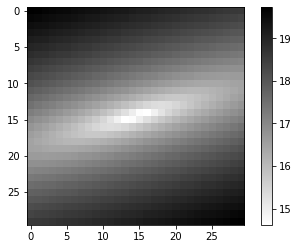

In [4]:
sbmap.sersic_map(mag = 12.0, r_eff = 2.0, n = 2.5, ellip = 0.8, theta = -50.0)

plt.imshow(sbmap.map, cmap = 'gray_r')
plt.colorbar()
plt.show()

### tanh速度场模型

类`Map2d`的方法`.tanh_map()`可以用来为该二维分布类模拟一个速度场，旋转曲线采用tanh函数。其中，`vmax`表示旋转速度的最大值，`rt`为旋转曲线的turn-over半径（单位：arcsec），`ellip`为椭率，`theta`为方向角。模拟得到的二维分布存储在属性`.map`中。

下面的例子为模拟一个速度场分布面亮度分布。

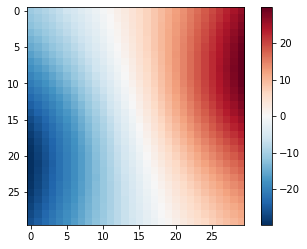

In [5]:
velmap = m.Map2d(config)
velmap.tanh_map(vmax = 100.0, rt = 2.0, ellip = 0.8, theta = -50.0)

plt.imshow(velmap.map, cmap = 'RdBu_r')
plt.colorbar()
plt.show()

## 梯度模型

类`Map2d`的方法`.gred_map()`可以用来为该二维分布类模拟一个梯度模型，二维分布上各个点的值随半径的变化遵从同一梯度。其中，`a0`表示椭圆中心的强度，`r_eff`为有效半径（单位：arcsec），`gred`为梯度，`ellip`为椭率，`theta`为方向角。模拟得到的二维分布存储在属性`.map`中。

该模型可以用于模拟星系速度弥散、星族年龄和金属丰度等物理参数的二维分布。

下面的例子为模拟一个星系星族年龄的二维分布。

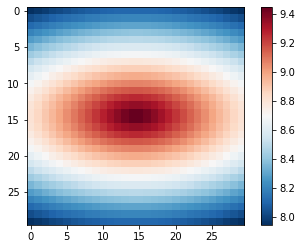

In [6]:
agemap = m.Map2d(config)
agemap.gred_map(a0 = 9.5, r_eff = 1, gred = -1.2, ellip = 0.5, theta = 0)

plt.imshow(agemap.map, cmap = 'RdBu_r')
plt.colorbar()
plt.show()

# 非参数二维分布模拟

`gehong`可以基于现有的物理参数二维分布（如观测结果和数值模拟结果），直接导入到`Map2d`中。

下面例子中，将从IllustrisTNG得到的物理参数二维分布作为输入。

### 数据读取

In [7]:
from astropy.io import fits
hdulist = fits.open('TNG_Example.fits')
print(hdulist.info())

Filename: TNG_Example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SURFACE_BRIGHT    1 ImageHDU         8   (30, 30)   float64   
  2  AGE_STAR      1 ImageHDU         8   (30, 30)   float64   
  3  FEH_STAR      1 ImageHDU         8   (30, 30)   float64   
  4  VEL_STAR      1 ImageHDU         8   (30, 30)   float64   
  5  SIG_STAR      1 ImageHDU         8   (30, 30)   float64   
  6  HA_FLUX       1 ImageHDU         8   (30, 30)   float64   
  7  ZH_GAS        1 ImageHDU         8   (30, 30)   float64   
  8  VEL_GAS       1 ImageHDU         8   (30, 30)   float64   
  9  SIG_GAS       1 ImageHDU         8   (30, 30)   float64   
None


### 分别导入数据

In [8]:
# 恒星星族相关Map
stellar_sbmap    = m.Map2d(config)
stellar_sbmap.load_map(hdulist[1].data)
stellar_agemap   = m.Map2d(config)
stellar_agemap.load_map(np.log10(hdulist[2].data*1e9))
stellar_fehmap   = m.Map2d(config)
stellar_fehmap.load_map(hdulist[3].data)
stellar_velmap   = m.Map2d(config)
stellar_velmap.load_map(hdulist[4].data)
stellar_vdispmap = m.Map2d(config)
stellar_vdispmap.load_map(hdulist[5].data)
# 气体相关Map
gas_hamap    = m.Map2d(config)
gas_hamap.load_map(hdulist[6].data)
gas_zhmap    = m.Map2d(config)
gas_zhmap.load_map(hdulist[7].data)
gas_velmap   = m.Map2d(config)
gas_velmap.load_map(hdulist[8].data)
gas_vdispmap = m.Map2d(config)
gas_vdispmap.load_map(hdulist[9].data)

### 结果展示

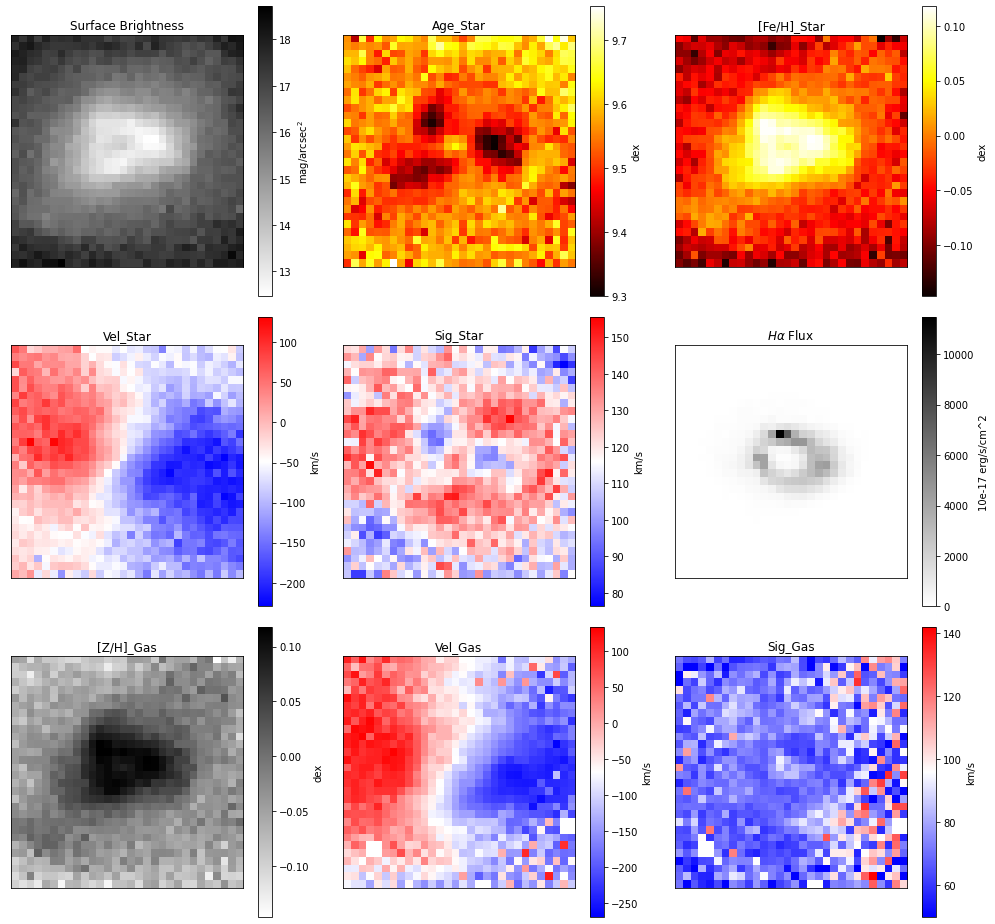

In [9]:
plt.figure(figsize=(14,13))
plt.subplot(331)
plt.imshow(stellar_sbmap.map,cmap='gray_r')
plt.title('Surface Brightness')
plt.colorbar(label='mag/arcsec$^2$')
plt.xticks([])
plt.yticks([])
plt.subplot(332)
plt.imshow(stellar_agemap.map,cmap='hot')
plt.title('Age_Star')
plt.colorbar(label='dex')
plt.xticks([])
plt.yticks([])
plt.subplot(333)
plt.imshow(stellar_fehmap.map,cmap='hot')
plt.title('[Fe/H]_Star')
plt.colorbar(label='dex')
plt.xticks([])
plt.yticks([])
plt.subplot(334)
plt.imshow(stellar_velmap.map,cmap='bwr')
plt.title('Vel_Star')
plt.colorbar(label='km/s')
plt.xticks([])
plt.yticks([])
plt.subplot(335)
plt.imshow(stellar_vdispmap.map,cmap='bwr')
plt.title('Sig_Star')
plt.colorbar(label='km/s')
plt.xticks([])
plt.yticks([])
plt.subplot(336)
plt.imshow(gas_hamap.map,cmap='gray_r')
plt.title(r'$H\alpha$ Flux')
plt.colorbar(label='10e-17 erg/s/cm^2')
plt.xticks([])
plt.yticks([])
plt.subplot(337)
plt.imshow(gas_zhmap.map,cmap='gray_r')
plt.title(r'[Z/H]_Gas')
plt.colorbar(label='dex')
plt.xticks([])
plt.yticks([])
plt.subplot(338)
plt.imshow(gas_velmap.map,cmap='bwr')
plt.title('Vel_Gas')
plt.colorbar(label='km/s')
plt.xticks([])
plt.yticks([])
plt.subplot(339)
plt.imshow(gas_vdispmap.map,cmap='bwr')
plt.title('Sig_Gas')
plt.colorbar(label='km/s')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


# 恒星星族二维分布的模拟

`map2d.StellarPopulationMap`用于整合用于模拟恒星连续谱的恒星星族物理参数二维分布，其中所有的输入均为class。

In [10]:
ebvmap = m.Map2d(config)
ebvmap.load_map(hdulist[5].data * 0 + 0.1)
stellarcontinuum = m.StellarPopulationMap(config, sbright = stellar_sbmap, 
                                          logage = stellar_agemap, feh = stellar_fehmap, 
                                          vel = stellar_velmap, vdisp = stellar_vdispmap, 
                                          ebv = ebvmap)

# 电离气体二维分布的模拟

`map2d.IonizedGasMap`用于整合用于模拟电离气体发射线的气体物理参数二维分布，其中所有的输入均为class。

In [11]:
ionizedgas = m.IonizedGasMap(config, halpha = gas_hamap, 
                             zh = gas_zhmap, vel = gas_velmap, 
                             vdisp = gas_vdispmap, ebv = ebvmap)